In [14]:


%load_ext autoreload
%autoreload 2

from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils



import json
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
model = OpenChemIE(device = torch.device('cuda'))

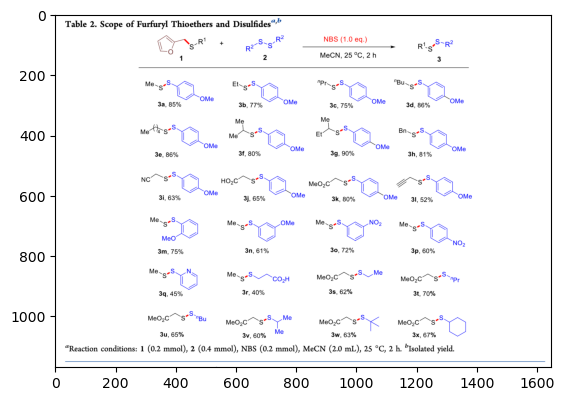

In [16]:
file_name = 'acs.joc.3c01355 example 1.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [17]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

Inspect the RxnScribe Outputs

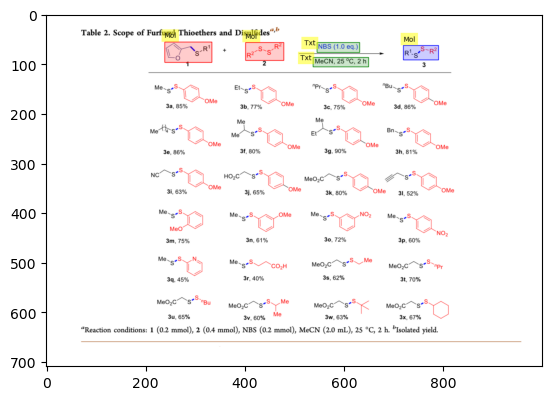

In [5]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

{'COc1ccc(SSCC#N)cc1': ['3i , 63%'], 'CCSSc1ccc(OC)cc1': ['3b, 77%'], 'COc1ccc(SSC)cc1': ['85%', '3a,'], 'CCCCSSCC(OC)OC': ['65%', '3u,'], 'CSSc1ccccn1': ['45%', '3q'], 'COc1ccccc1SSC': ['75%', '3m,'], '[1*]SCc1ccco1': ['1'], 'COc1ccc(SSCC(=O)O)cc1': ['3j, 65%'], 'COC(CSSC(C)C)OC': ['60%', '3v,'], 'COc1cccc(SSC)c1': ['61%', '3n,'], 'CSSCCC(=O)O': ['40%', '3r,'], '*C(C)SSc1ccc(OC)cc1': ['3f, 80%'], '[2*]SS[2*]': ['2'], 'COC(CS(CC(OC)OC)=[SH]c1ccc(OC)cc1)OC': ['3k, 80%'], 'CCC(C)SSc1ccc(OC)cc1': ['90%', '39,'], 'CCSSCC(OC)OC': ['62%', '35,'], 'CCCSSc1ccc(OC)cc1': ['75%', '3C,'], 'CSSc1cccc([N+](=O)[O-])c1': ['72%', '30,'], 'COC(CSSC(C)(C)C)OC': ['63%', '3w,'], 'C#CCSSc1ccc(OC)cc1': ['31, 52%'], 'CCCCSSc1ccc(OC)cc1': ['3d', 'J', '86%'], 'COc1ccc(SSCc2ccccc2)cc1': ['3h, 81%'], 'CCCSSCC(OC)OC': ['60%', '3P,'], 'CSSc1ccc([N+](=O)[O-])cc1': ['60%', '3P,'], 'COC(CSSC1CCCCC1)OC': ['67%', '3X,'], '[1*]SS[2*]': ['3']}


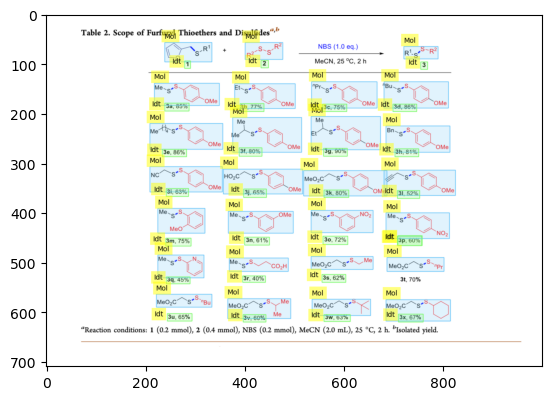

In [6]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

[1*]SCc1ccco1


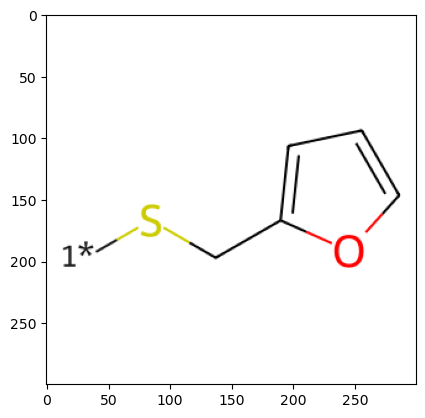

[2*]SS[2*]


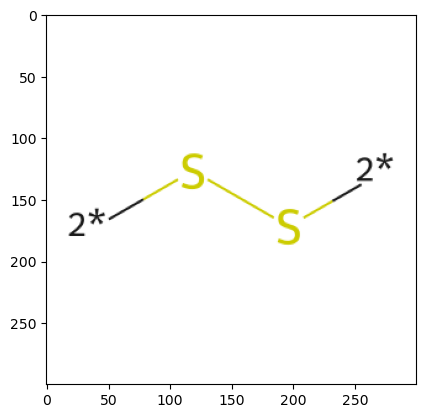

[1*]SS[2*]


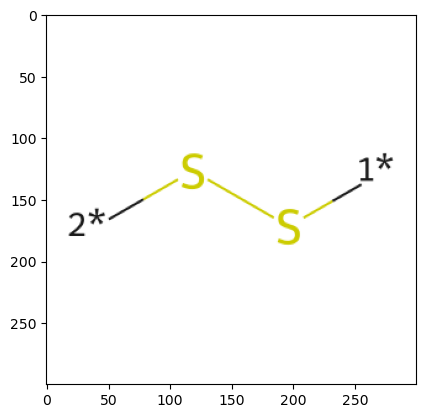

In [7]:
reactants_array = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants_array.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [8]:
backed_out = utils.backout(results, coref_results)

these are the predicted reactants corresponding the product with label 3i , 63%
COc1ccc(SCc2ccco2)cc1


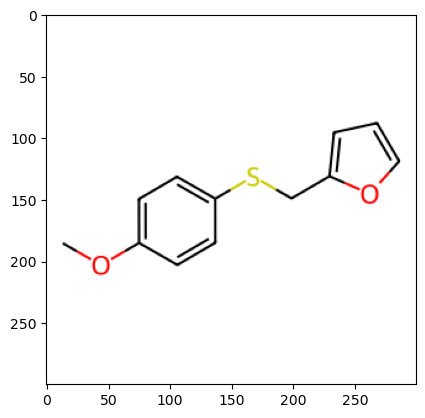

N#CCSSCC#N


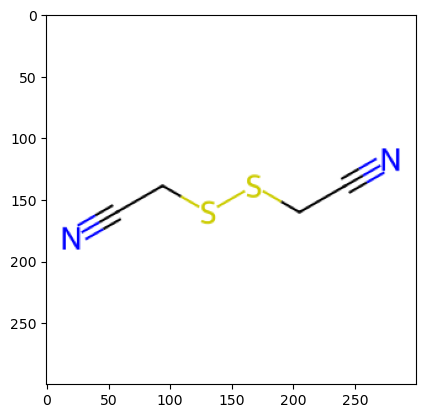

these are the predicted reactants corresponding the product with label 3b, 77%
CCSCc1ccco1


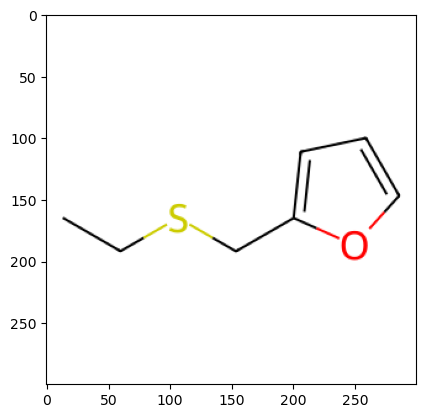

COc1ccc(SSc2ccc(OC)cc2)cc1


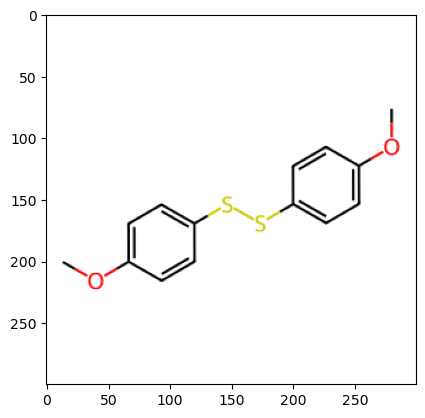

these are the predicted reactants corresponding the product with label 3a,
COc1ccc(SCc2ccco2)cc1


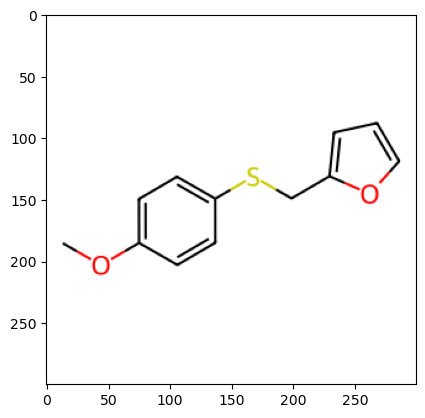

CSSC


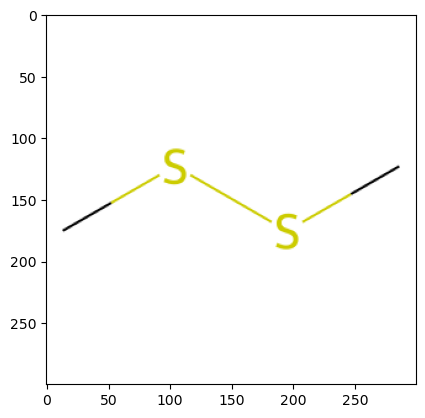

these are the predicted reactants corresponding the product with label 3u,
CCCCSCc1ccco1


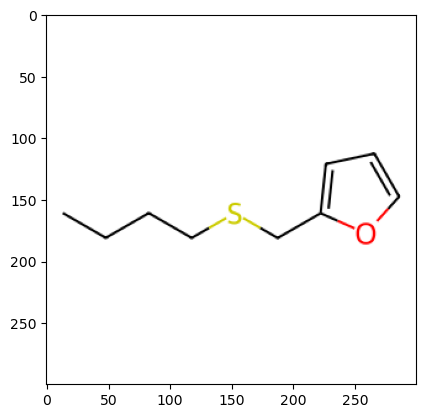

COC(CSSCC(OC)OC)OC


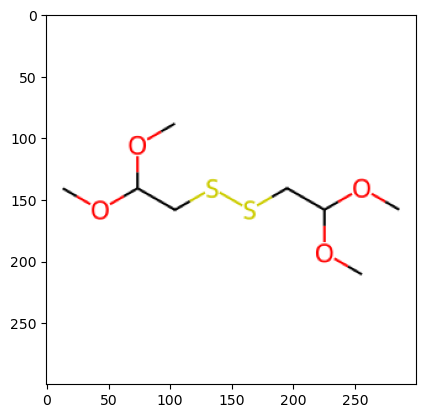

these are the predicted reactants corresponding the product with label 3q
CSCc1ccco1


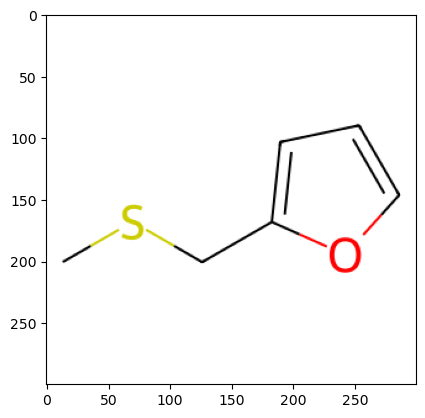

c1ccc(SSc2ccccn2)nc1


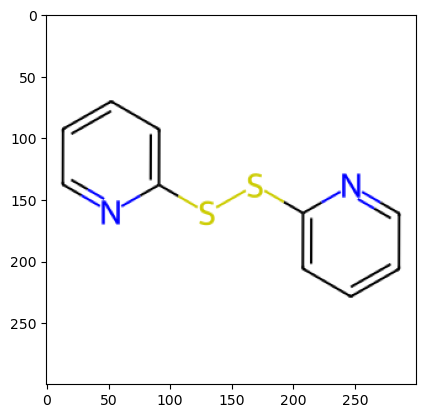

these are the predicted reactants corresponding the product with label 3m,
COc1ccccc1SCc1ccco1


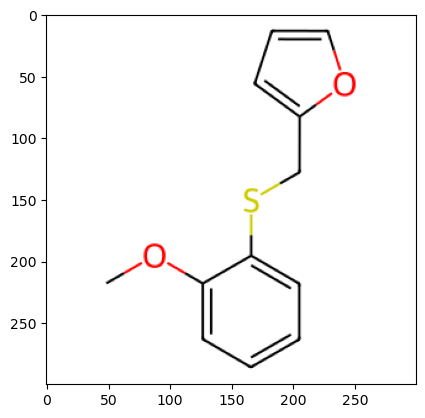

CSSC


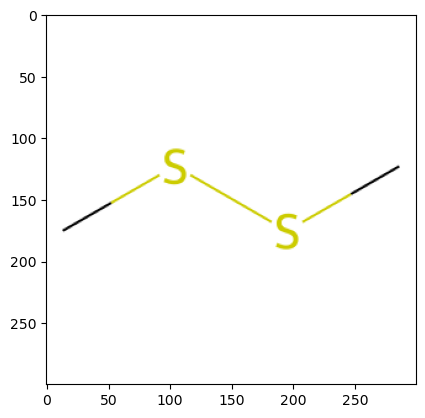

these are the predicted reactants corresponding the product with label 3j, 65%
COc1ccc(SCc2ccco2)cc1


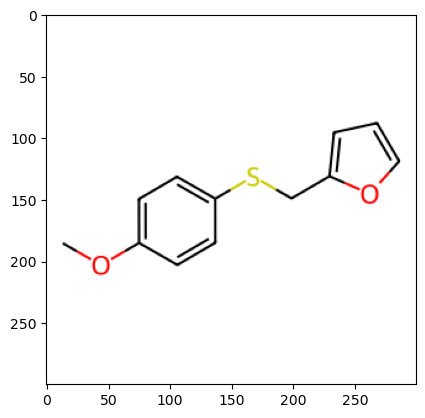

O=C(O)CSSCC(=O)O


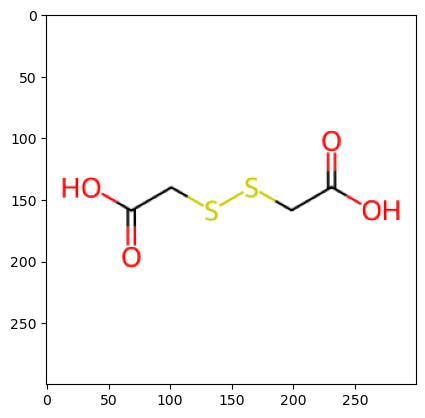

these are the predicted reactants corresponding the product with label 3v,
COC(CSCc1ccco1)OC


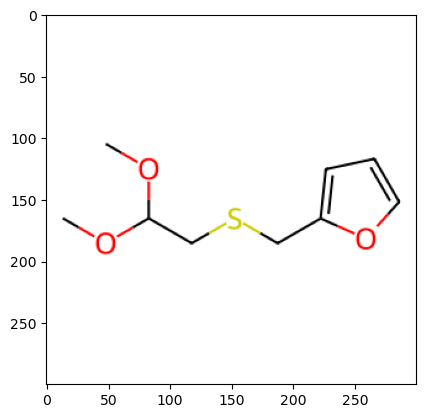

CC(C)SSC(C)C


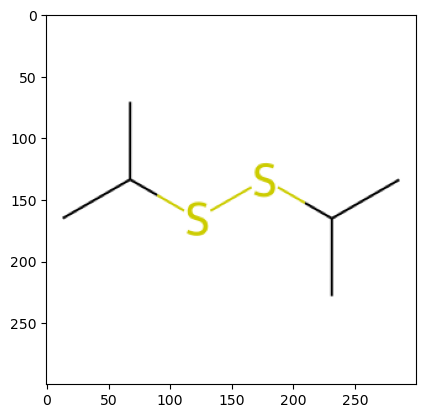

these are the predicted reactants corresponding the product with label 3n,
COc1cccc(SCc2ccco2)c1


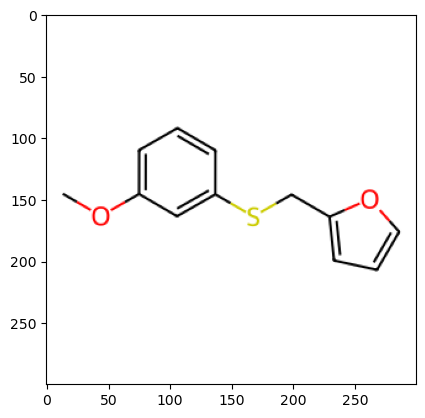

CSSC


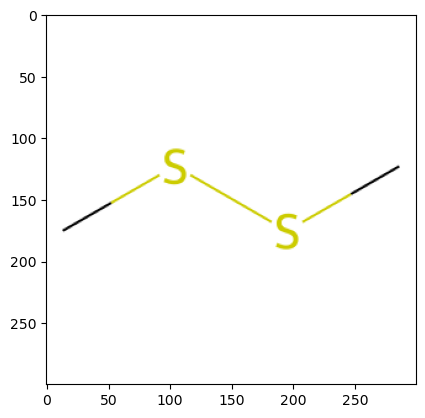

these are the predicted reactants corresponding the product with label 3r,
CSCc1ccco1


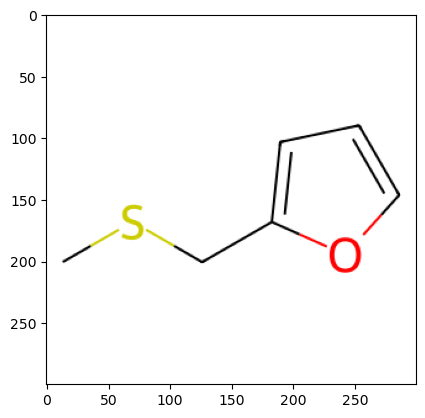

O=C(O)CCSSCCC(=O)O


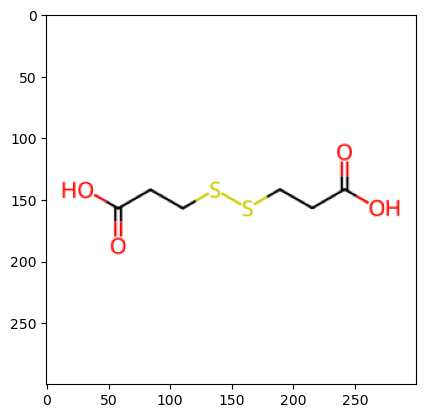

these are the predicted reactants corresponding the product with label 3f, 80%
*C(C)SCc1ccco1


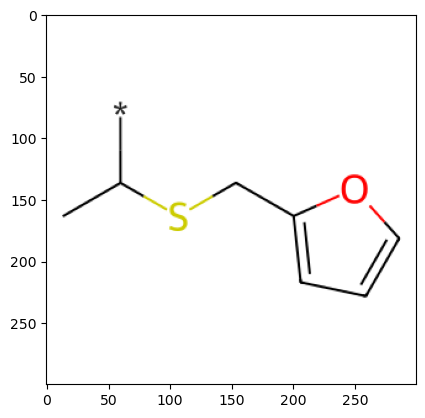

COc1ccc(SSc2ccc(OC)cc2)cc1


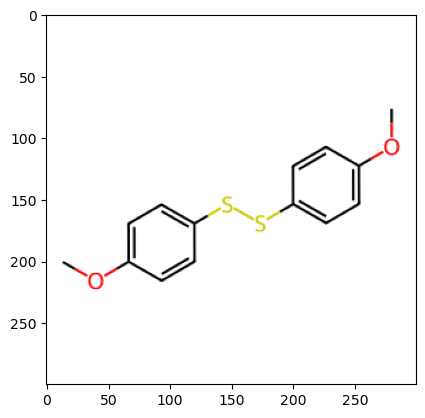

these are the predicted reactants corresponding the product with label 3C,
CCCSCc1ccco1


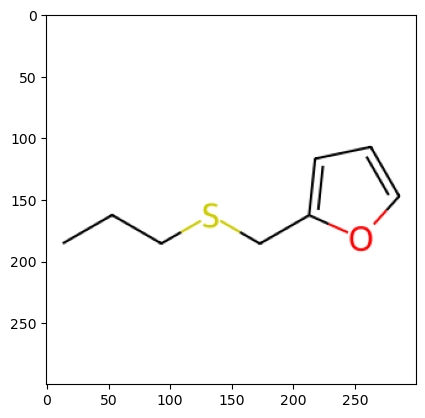

COc1ccc(SSc2ccc(OC)cc2)cc1


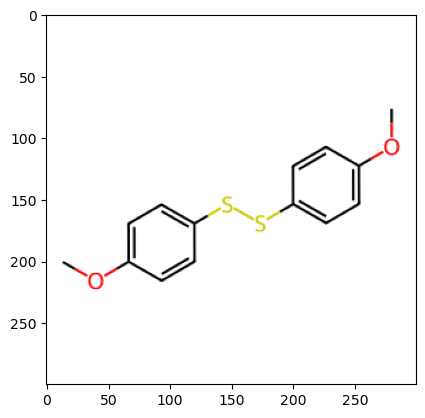

these are the predicted reactants corresponding the product with label 3w,
COC(CSCc1ccco1)OC


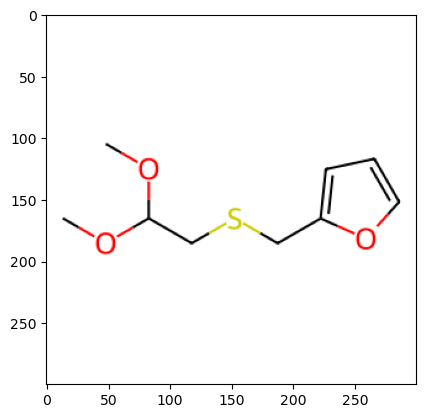

CC(C)(C)SSC(C)(C)C


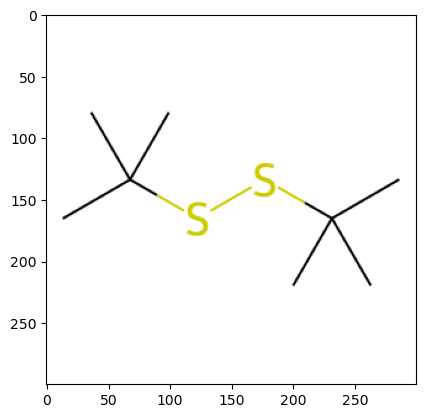

these are the predicted reactants corresponding the product with label 3d
CCCCSCc1ccco1


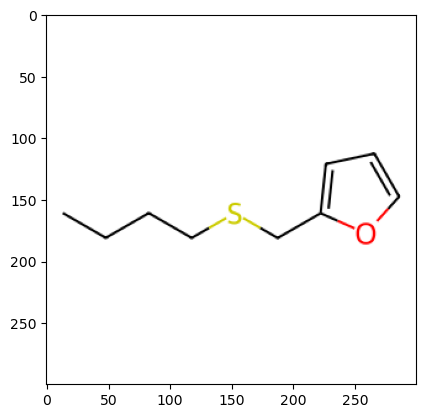

COc1ccc(SSc2ccc(OC)cc2)cc1


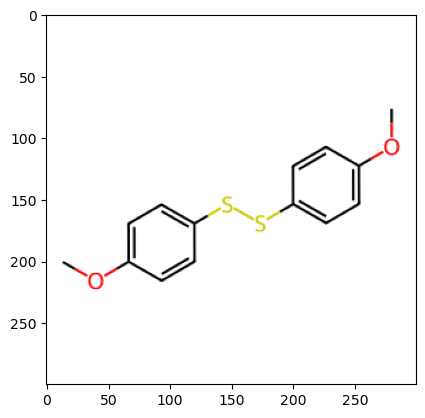

these are the predicted reactants corresponding the product with label 3h, 81%
COc1ccc(SCc2ccco2)cc1


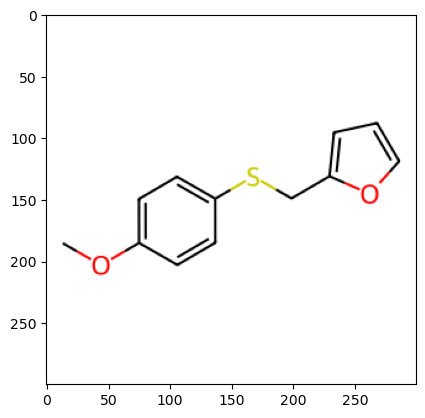

c1ccc(CSSCc2ccccc2)cc1


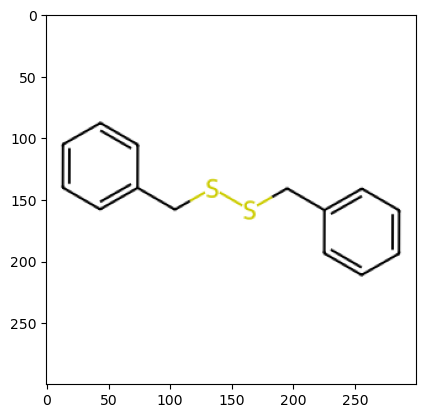

these are the predicted reactants corresponding the product with label 3P,
CCCSCc1ccco1


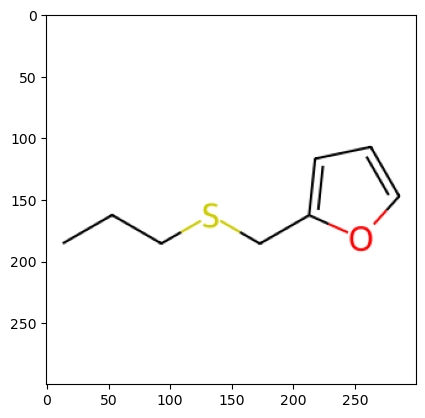

COC(CSSCC(OC)OC)OC


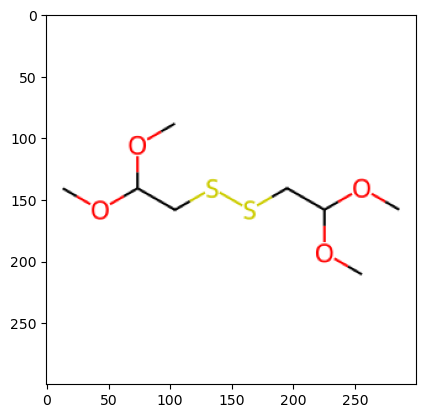

these are the predicted reactants corresponding the product with label 3P,
CSCc1ccco1


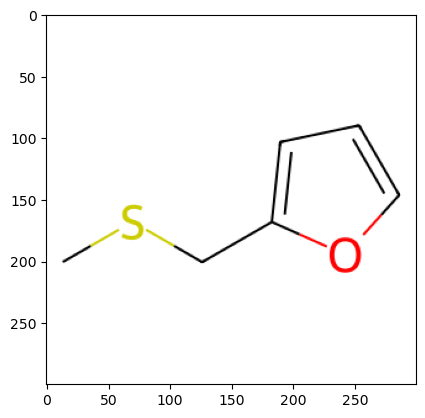

O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2)cc1


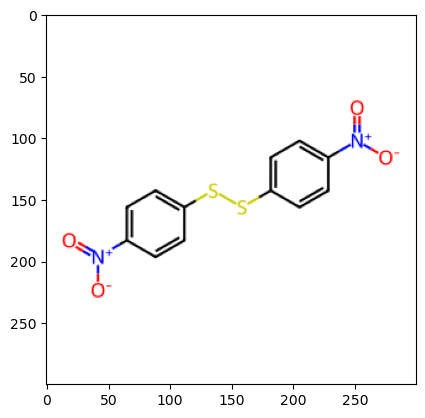

these are the predicted reactants corresponding the product with label 3X,
COC(CSCc1ccco1)OC


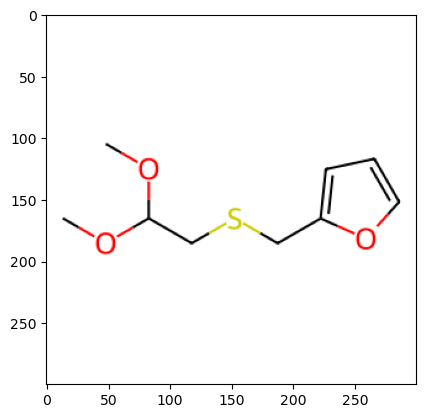

C1CCC(SSC2CCCCC2)CC1


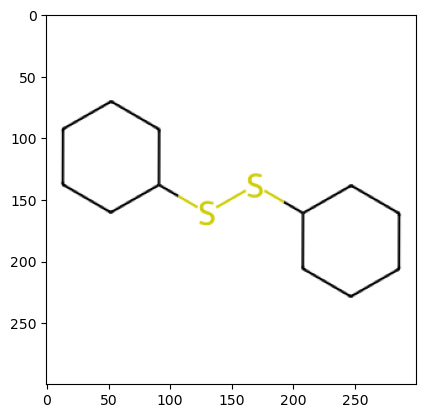

In [10]:
extracted_reactants = {}

for reactants, _, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()

backout results:


precision 6/24 recall 6/17

In [11]:
toadd = {
        "file_name": file_name,
        "main_reaction":
            {
                "reactants": reactants_array,
                "products": products
            },
        "extracted_reactants": extracted_reactants
    }

In [12]:
sorted_keys = list(toadd["extracted_reactants"].keys())
sorted_keys.sort()

toadd["extracted_reactants"] = {i: toadd["extracted_reactants"][i] for i in sorted_keys}

In [13]:
toadd

{'file_name': 'acs.joc.3c01355 example 1.png',
 'main_reaction': {'reactants': ['[1*]SCc1ccco1', '[2*]SS[2*]'],
  'products': ['[1*]SS[2*]']},
 'extracted_reactants': {'3C,': ['CCCSCc1ccco1', 'COc1ccc(SSc2ccc(OC)cc2)cc1'],
  '3P,': ['CSCc1ccco1', 'O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2)cc1'],
  '3X,': ['COC(CSCc1ccco1)OC', 'C1CCC(SSC2CCCCC2)CC1'],
  '3a,': ['COc1ccc(SCc2ccco2)cc1', 'CSSC'],
  '3b, 77%': ['CCSCc1ccco1', 'COc1ccc(SSc2ccc(OC)cc2)cc1'],
  '3d': ['CCCCSCc1ccco1', 'COc1ccc(SSc2ccc(OC)cc2)cc1'],
  '3f, 80%': ['*C(C)SCc1ccco1', 'COc1ccc(SSc2ccc(OC)cc2)cc1'],
  '3h, 81%': ['COc1ccc(SCc2ccco2)cc1', 'c1ccc(CSSCc2ccccc2)cc1'],
  '3i , 63%': ['COc1ccc(SCc2ccco2)cc1', 'N#CCSSCC#N'],
  '3j, 65%': ['COc1ccc(SCc2ccco2)cc1', 'O=C(O)CSSCC(=O)O'],
  '3m,': ['COc1ccccc1SCc1ccco1', 'CSSC'],
  '3n,': ['COc1cccc(SCc2ccco2)c1', 'CSSC'],
  '3q': ['CSCc1ccco1', 'c1ccc(SSc2ccccn2)nc1'],
  '3r,': ['CSCc1ccco1', 'O=C(O)CCSSCCC(=O)O'],
  '3u,': ['CCCCSCc1ccco1', 'COC(CSSCC(OC)OC)OC'],
  '3v,': [

In [12]:
input_file = 'table_data.json'
with open(input_file, 'r') as file:
    data = json.load(file)

# Step 2: Add "toadd" to the list
data.append(toadd)

# Step 3: Write the updated data to a new JSON file
output_file = 'table_data.json'
with open(output_file, 'w') as file:
    json.dump(data, file, indent=4)

print(f'Updated data written to {output_file}')

Updated data written to table_data.json


In [18]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)[0]

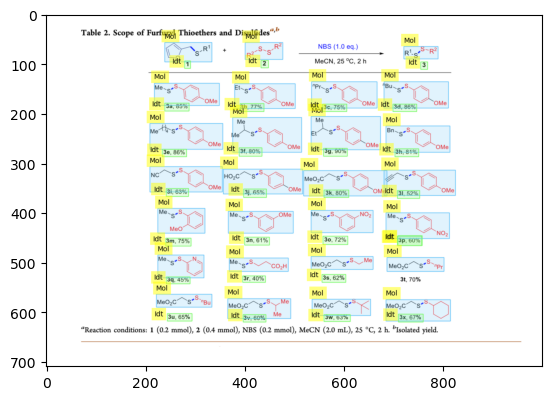

In [19]:
plt.imshow(coref_output)

COc1ccc(SSCC#N)cc1


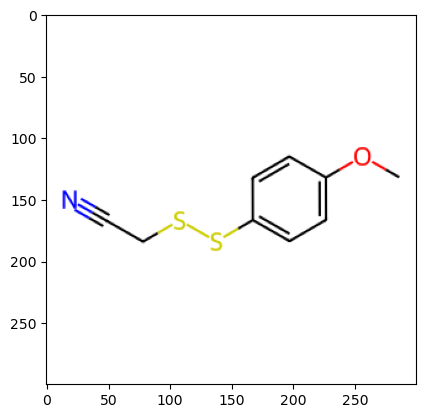

CCSSc1ccc(OC)cc1


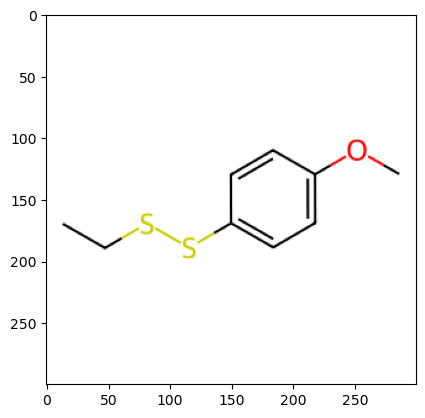

COc1ccc(SSC)cc1


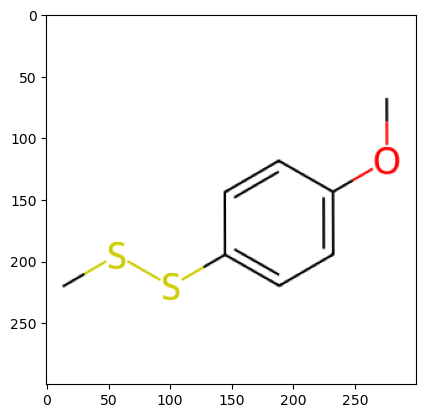

CCCCSSCC(OC)OC


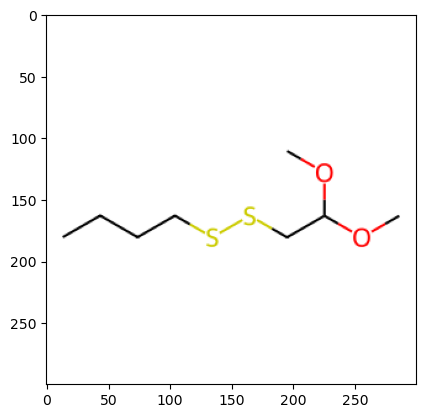

CSSc1ccccn1


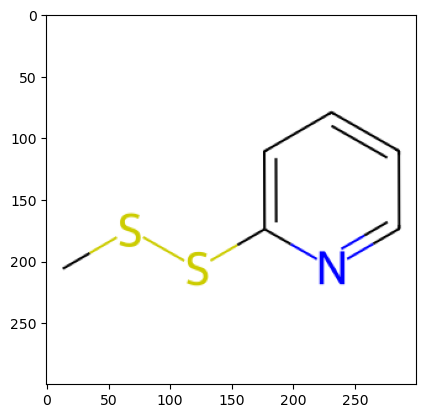

COc1ccccc1SSC


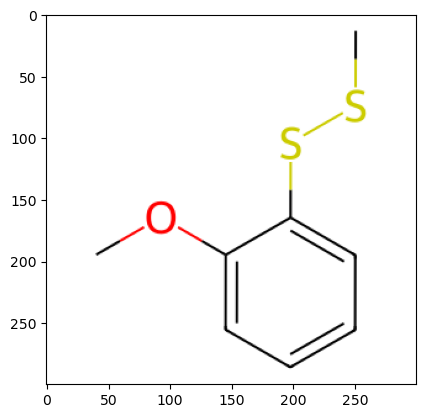

[1*]SCc1ccco1


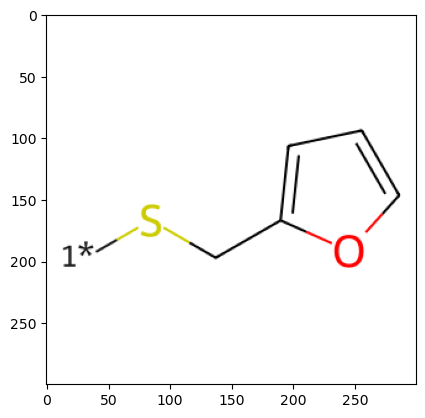

COc1ccc(SSCC(=O)O)cc1


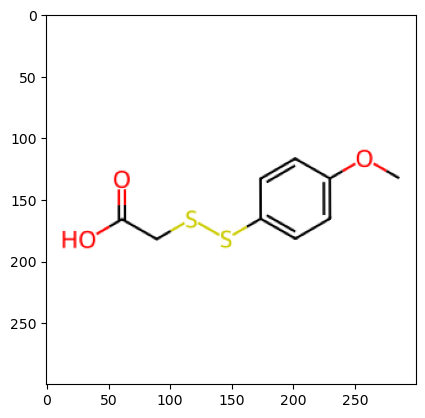

COC(CSSC(C)C)OC


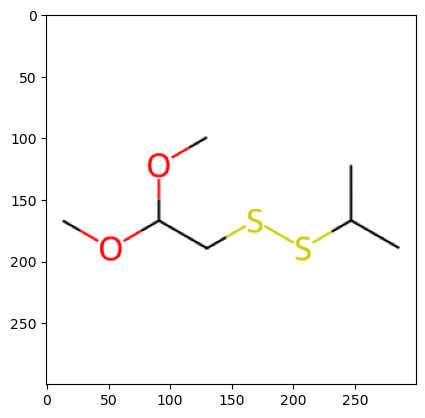

COc1cccc(SSC)c1


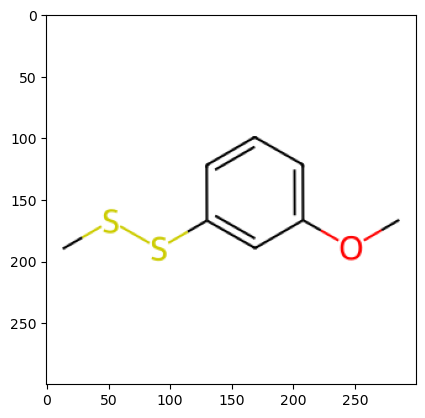

CSSCCC(=O)O


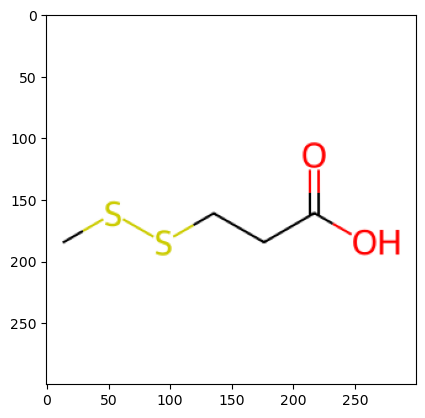

*C(C)SSc1ccc(OC)cc1


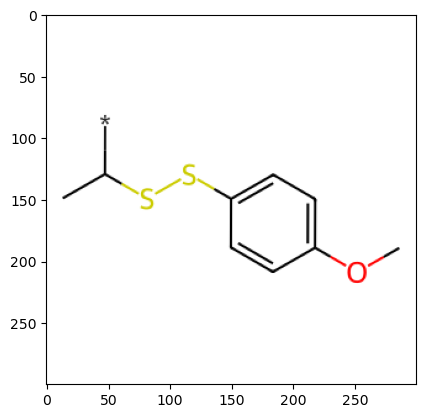

CCSSc1ccc(OC)cc1


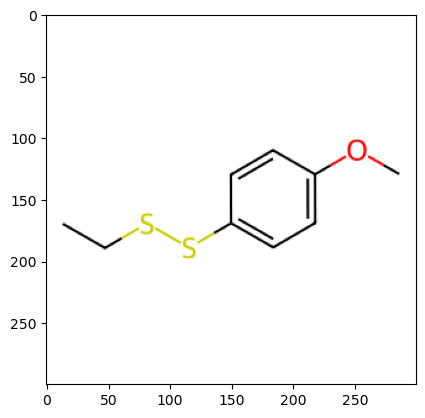

[2*]SS[2*]


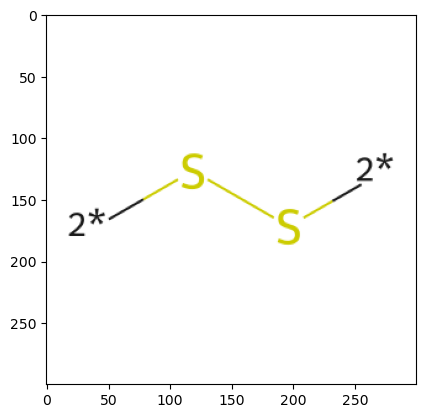

COC(CS(CC(OC)OC)=[SH]c1ccc(OC)cc1)OC


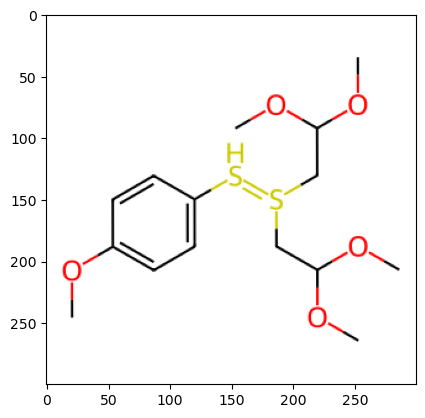

CCC(C)SSc1ccc(OC)cc1


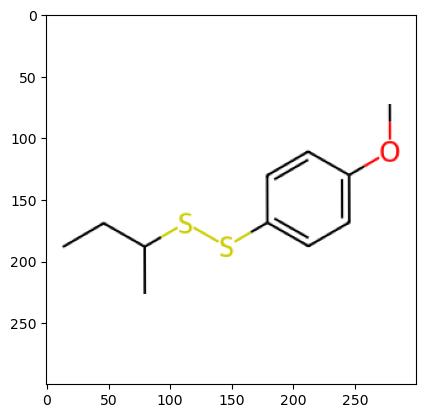

CCSSCC(OC)OC


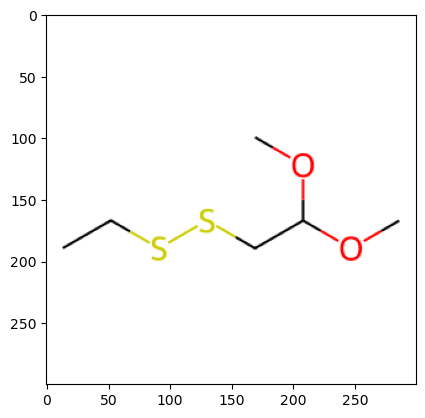

CCCSSc1ccc(OC)cc1


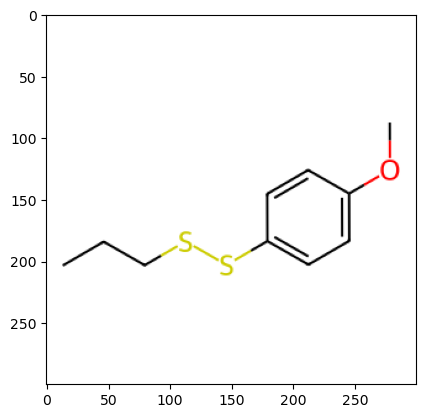

CSSc1cccc([N+](=O)[O-])c1


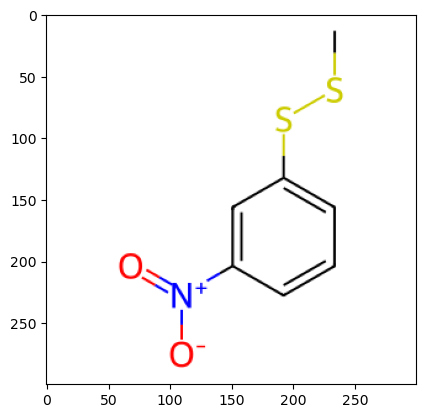

COC(CSSC(C)(C)C)OC


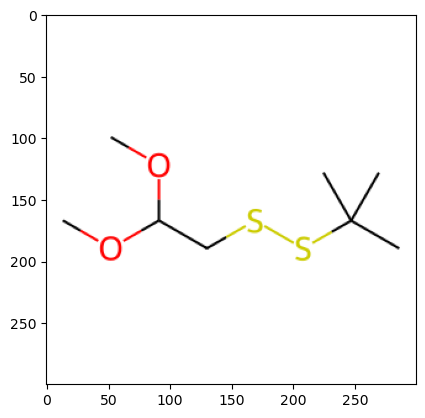

C#CCSSc1ccc(OC)cc1


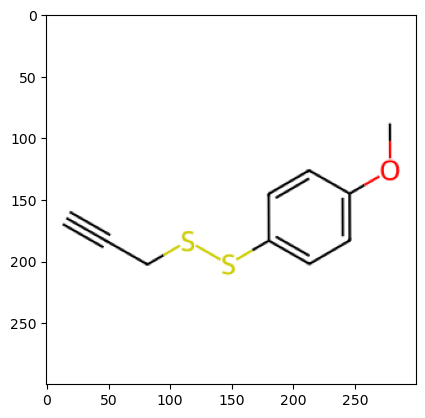

CCCCSSc1ccc(OC)cc1


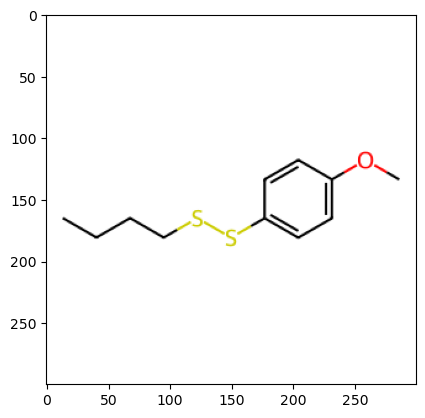

COc1ccc(SSCc2ccccc2)cc1


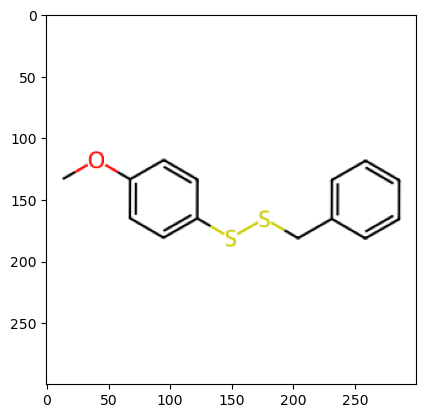

CCCSSCC(OC)OC


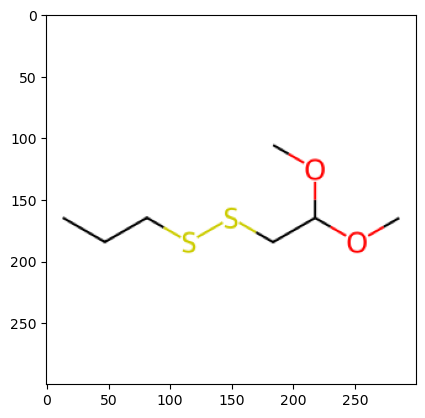

CSSc1ccc([N+](=O)[O-])cc1


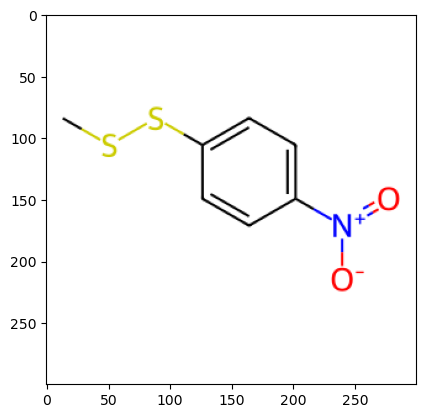

COC(CSSC1CCCCC1)OC


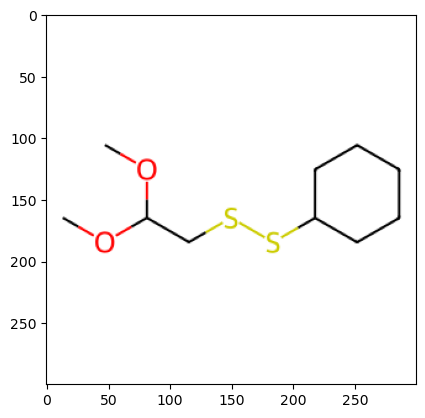

[1*]SS[2*]


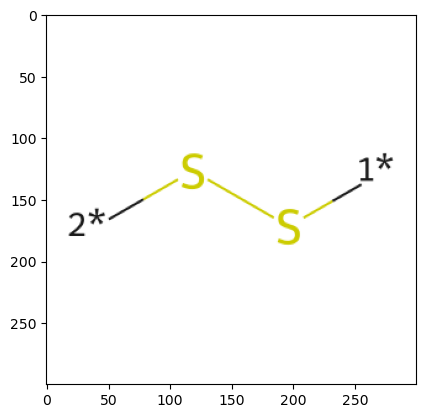

In [20]:
for bbox in coref_results[0]['bboxes']:
    if bbox['category'] == '[Mol]':
        print(bbox['smiles'])
        if Chem.MolFromSmiles(bbox['smiles']) is not None:
            i = Draw.MolToImage(Chem.MolFromSmiles(bbox['smiles']))
            plt.imshow(i)
            plt.show()
    